In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data_cleaned.csv", index_col=0)

In [3]:
df.head()

,Repository,Sujets,Etoiles,Langages,PullRequests,Forks,NumberOfContributors,Comments,Tags
0,SysCV/sam-hq,"['sam', 'segmentation', 'segment-anything', 'z...",1758.0,['Python'],0.0,56.0,1.0,0.0,0.0
1,Not-Quite-RARBG/main,"['rarbg', 'torrent', 'torrents']",610.0,['JavaScript'],0.0,21.0,7.0,1.0,0.0
2,mit-han-lab/llm-awq,No Topic,354.0,"['Python', 'Cuda', 'Shell', 'C++', 'C']",0.0,24.0,3.0,0.0,0.0
3,KasperskyLab/triangle_check,No Topic,299.0,['Python'],0.0,18.0,4.0,0.0,1.0
4,damo-vilab/videocomposer,No Topic,229.0,"['Python', 'Shell']",0.0,6.0,2.0,0.0,0.0


# Data Mining

In [4]:
# Quelle(s) relation(s) entre les colonnes ?
# Quelle(s) distribution(s) des variables ?
# Quels sont les langages les plus utilisés ?
# Quels sont les projets tendances ?
# Quels sont les sujets tendances ?
# Quels sont les langages tendances ?
# Quels sont les sujets les traités ?
# Quels sont les sujets intéressants ?
# Les projets tendance sont-ils des projets intéressants ?

In [5]:
correlation_matrix_pearson = df[["Etoiles", "Forks", "NumberOfContributors", "Comments", "Tags"]].corr(method='pearson')
correlation_matrix_pearson

,Etoiles,Forks,NumberOfContributors,Comments,Tags
Etoiles,1.000000,0.673447,0.012466,0.002393,0.001211
Forks,0.673447,1.000000,0.033620,0.011364,0.009073
NumberOfContributors,0.012466,0.033620,1.000000,0.023391,0.260007
Comments,0.002393,0.011364,0.023391,1.000000,0.074658
Tags,0.001211,0.009073,0.260007,0.074658,1.000000


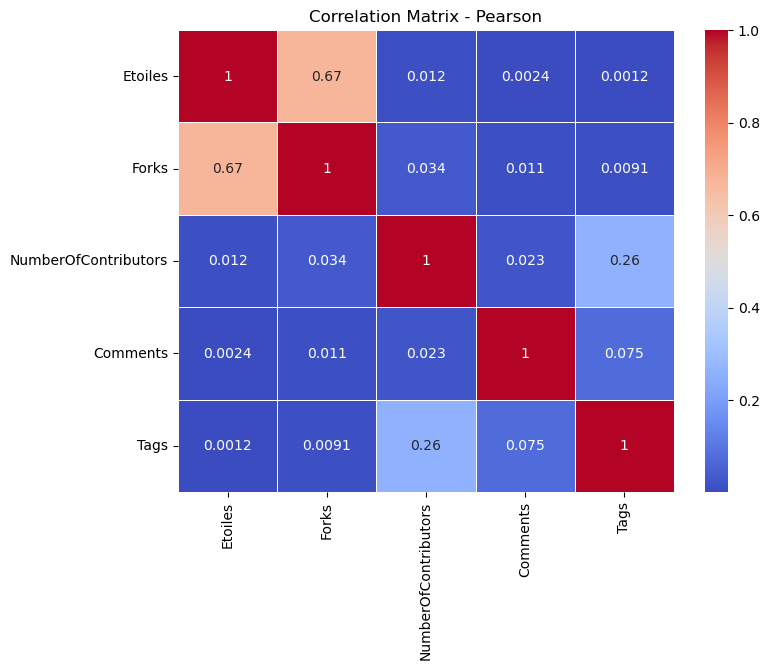

In [6]:
# Représentation graphique de la matrice
import seaborn as sns
import matplotlib.pyplot as plt

# Plot correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_pearson, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix - Pearson')
plt.show()

La corrélation de Pearson est une mesure de la corrélation linéaire entre deux variables continues. Elle calcule le coefficient de corrélation de Pearson, qui varie de -1 à 1. Une corrélation de 1 indique une corrélation linéaire positive parfaite, une corrélation de -1 indique une corrélation linéaire négative parfaite, et une corrélation de 0 indique une absence de corrélation linéaire. La corrélation de Pearson suppose que les variables sont distribuées normalement.

Les résultats présentés montrent soit une faible correlation entre "Etoiles" <===>"Forks", soit une très faible correlation, voire pas de relation. Il n'existe donc pas de relation lineaire entre les différents champs de notre dataset.  

Vérifions donc la distribution des variables 

# La distribution des variables 

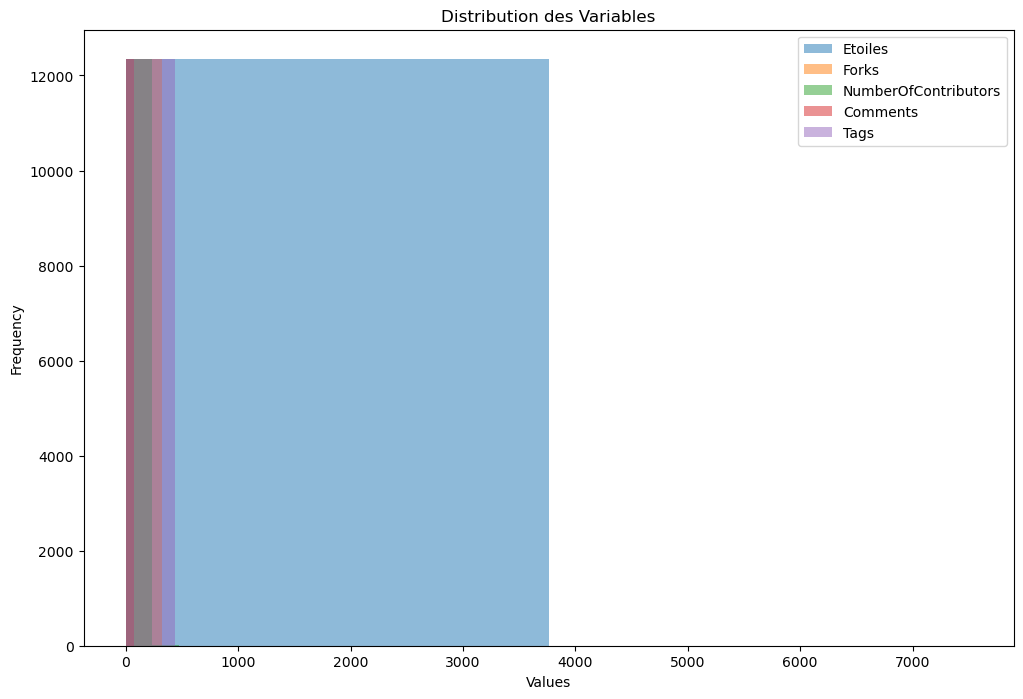

In [7]:
import matplotlib.pyplot as plt
data = df[["Etoiles", "Forks", "NumberOfContributors", "Comments", "Tags"]]
# Plot distribution of each variable
plt.figure(figsize=(12, 8))

# Iterate over each column in the DataFrame
for column in data.columns:
    plt.hist(data[column], bins=2, alpha=0.5, label=column)

plt.legend(loc='upper right')
plt.title('Distribution des Variables')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

Distribution inconnue

# Langages et technologies les plus utilisés

In [8]:
langages = []
for i in range(df.shape[0]):
    if df["Langages"][i] != "No Langage":
        langages.extend(eval(df["Langages"][i]))
    else:
        langages.append("No Langage")

TypeError: eval() arg 1 must be a string, bytes or code object

In [9]:
from collections import Counter

occurrences = Counter(langages)

for element, count in occurrences.items():
    print(f"{element}: {count}")

Python: 62
JavaScript: 42
Cuda: 3
Shell: 24
C++: 11
C: 10
Jupyter Notebook: 9
No Langage: 31
TypeScript: 16
Rust: 3
Lua: 1
Tcl: 1
Ruby: 4
HTML: 28
CSS: 23
Java: 3
Dockerfile: 10
CMake: 2
Go: 7
Vue: 5
SCSS: 4
Makefile: 12
PHP: 4
Agda: 1
Dart: 2
Swift: 4
Kotlin: 2
Objective-C: 4
Nix: 1
Procfile: 1
Batchfile: 5
AppleScript: 1
Assembly: 2
CUE: 1
C#: 4
Pascal: 1
Logos: 1
Common Lisp: 1
Blade: 2
Processing: 1
HLSL: 1
Julia: 1
Svelte: 2
ASL: 1


[Cuda, Shell, No Langage, Dockerfile, CMake, Makefile, Nix, Procfile, CUE, Blade, ASL] ne sont pas des langages de programmation. Les outils comme Jupyter Notebook et les frameworks comme Vue seront utilisés pour détecter les technologies et les frameworks les plus utilisés

In [10]:
excluded_languages = ["Cuda", "Shell", "No Langage", "Batchfile", "Dockerfile", "CMake", "Makefile", "Nix", "Procfile", "CUE", "Blade", "ASL"]
#technologies = ["Jupyter Notebook", "Vue"]

# Create a new dictionary without the excluded languages
filtered_occurrences = {language: count for language, count in occurrences.items() if language not in excluded_languages}
#filtered_technologies = {language: count for language, count in occurrences.items() if language not in technologies}

# Sort the dictionary by occurrence count in descending order
sorted_occurrences = dict(sorted(filtered_occurrences.items(), key=lambda x: x[1], reverse=True))
#sorted_technologies = dict(sorted(filtered_occurrences.items(), key=lambda x: x[1], reverse=True))

# Print the sorted occurrences
for language, count in sorted_occurrences.items():
    print(f"{language}: {count}")

Python: 62
JavaScript: 42
HTML: 28
CSS: 23
TypeScript: 16
C++: 11
C: 10
Jupyter Notebook: 9
Go: 7
Vue: 5
Ruby: 4
SCSS: 4
PHP: 4
Swift: 4
Objective-C: 4
C#: 4
Rust: 3
Java: 3
Dart: 2
Kotlin: 2
Assembly: 2
Svelte: 2
Lua: 1
Tcl: 1
Agda: 1
AppleScript: 1
Pascal: 1
Logos: 1
Common Lisp: 1
Processing: 1
HLSL: 1
Julia: 1


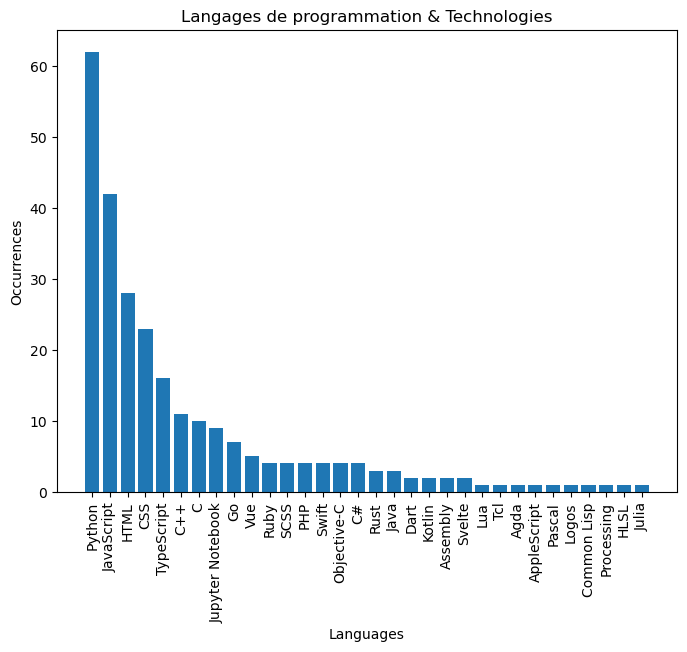

In [11]:
from collections import Counter
import matplotlib.pyplot as plt

# occurrences = Counter(langages)

# Extract the languages and their respective counts
languages = sorted_occurrences.keys()
counts = sorted_occurrences.values()

# Plot the occurrences as a bar plot
plt.figure(figsize=(8, 6))
plt.bar(languages, counts)
plt.title('Langages de programmation & Technologies')
plt.xlabel('Languages')
plt.ylabel('Occurrences')
plt.xticks(rotation='vertical')
plt.show()


In [12]:
# from collections import Counter
# import matplotlib.pyplot as plt

# # occurrences = Counter(langages)

# # Extract the languages and their respective counts
# tech = sorted_technologies.keys()
# counts = sorted_technologies.values()

# # Plot the occurrences as a bar plot
# plt.figure(figsize=(8, 6))
# plt.bar(tech, counts)
# plt.title('Langages de programmation & Technologies')
# plt.xlabel('Languages')
# plt.ylabel('Occurrences')
# plt.xticks(rotation='vertical')
# plt.show()

# Les sujets les plus traités

In [19]:
# df[df.index == 202]

In [20]:
sujets = []

for i in range(df.shape[0]):
    if df.iloc[i, 1] != "No Topic":
        sujets.extend(eval(df.iloc[i, 1]))
    else:
        sujets.append("No Topic")

TypeError: eval() arg 1 must be a string, bytes or code object

In [21]:
from collections import Counter

occurrences_topic = Counter(sujets)

for element, count in occurrences_topic.items():
    print(f"{element}: {count}")

sam: 2
segmentation: 2
segment-anything: 1
zero-shot-segmentation: 1
high-quality: 1
rarbg: 1
torrent: 1
torrents: 1
No Topic: 10327
text-to-image-diffusion: 1
personalized-generation: 1
monorepo: 2
monorepos: 1
nx: 2
nx-workspace: 2
neovim-theme: 1
dark-theme: 2
lua: 6
neovim: 2
treesitter: 1
sniper-bot: 2
nerf: 1
texture-synthesis: 1
bubbletea: 1
charmcli: 1
go: 8
golang: 12
ai: 17
bubbles: 1
charmbracelet: 1
github-actions: 4
lipgloss: 1
openai: 14
openai-api: 6
tui: 2
cobra: 2
cobra-cli: 2
chatgpt3: 1
gui-application: 1
tkinter-python: 1
diffusion-models: 3
large-language-models: 5
long-context: 1
rce-exploit: 1
rocketmq: 1
cve-2023-33246: 1
proxy-addr: 1
proxy-check: 1
proxy-checker: 2
proxy-checker-free: 1
proxy-checker-github: 1
proxy-checking: 1
proxy-grabbed: 1
proxy-grabber: 1
proxy-scrap: 1
proxy-scraper: 2
proxy-scrapers: 1
proxy-scrapper: 1
proxy-scrappers: 1
proxy-tool: 1
proxy-tools: 1
telegram-add-group: 1
telegram-add-members: 1
telegram-adder: 1
telegram-adder-tool: 1

In [22]:
# Ordre croissant
sorted_occurrences_topic = dict(sorted(occurrences_lang.items(), key=lambda x: x[1], reverse=True))
sorted_occurrences_topic

{'No Topic': 10327,
 'python': 41,
 'chatgpt': 23,
 'javascript': 22,
 'config': 21,
 'react': 20,
 'github-config': 20,
 'typescript': 18,
 'ai': 17,
 'android': 17,
 'openai': 14,
 'nodejs': 13,
 'golang': 12,
 'html': 12,
 'java': 12,
 'llm': 11,
 'css': 11,
 'machine-learning': 10,
 'rust': 10,
 'tailwindcss': 10,
 'api': 10,
 'reactjs': 10,
 'deep-learning': 9,
 'nextjs': 9,
 'go': 8,
 'discord': 8,
 'flutter': 8,
 'langchain': 8,
 'cli': 7,
 'ios': 7,
 'swift': 7,
 'github': 7,
 'cpp': 7,
 'lua': 6,
 'openai-api': 6,
 'pytorch': 6,
 'google': 6,
 'gpl3': 6,
 'gplv3': 6,
 'markdown': 6,
 'md': 6,
 'txt': 6,
 'nlp': 6,
 'game': 6,
 'gpt-4': 6,
 'kotlin': 6,
 'large-language-models': 5,
 'macos': 5,
 'vue': 5,
 'svelte': 5,
 'vite': 5,
 'json': 5,
 'python3': 5,
 'github-actions': 4,
 'c': 4,
 'telegram': 4,
 'discord-bot': 4,
 'streamlit': 4,
 'project': 4,
 'jetpack-compose': 4,
 'website': 4,
 'laravel': 4,
 'html-css-javascript': 4,
 'php': 4,
 'jupyter-notebook': 4,
 'minecraft

In [43]:
excluded_topics = ["No Topic"]
#technologies = ["Jupyter Notebook", "Vue"]

# Create a new dictionary without the excluded languages
filtered_occurrences_topic = {topic: count for topic, count in occurrences_lang.items() if topic not in excluded_topics}
#filtered_technologies = {language: count for language, count in occurrences.items() if language not in technologies}

# Sort the dictionary by occurrence count in descending order
sorted_occurrences_topic = dict(sorted(filtered_occurrences_topic.items(), key=lambda x: x[1], reverse=True))
#sorted_technologies = dict(sorted(filtered_occurrences.items(), key=lambda x: x[1], reverse=True))

# Print the sorted occurrences
for topic, count in sorted_occurrences.items():
    top_topics.append([topic, count])
    print(f"{topic}: {count}")

python: 41
chatgpt: 23
javascript: 22
config: 21
react: 20
github-config: 20
typescript: 18
ai: 17
android: 17
openai: 14
nodejs: 13
golang: 12
html: 12
java: 12
llm: 11
css: 11
machine-learning: 10
rust: 10
tailwindcss: 10
api: 10
reactjs: 10
deep-learning: 9
nextjs: 9
go: 8
discord: 8
flutter: 8
langchain: 8
cli: 7
ios: 7
swift: 7
github: 7
cpp: 7
lua: 6
openai-api: 6
pytorch: 6
google: 6
gpl3: 6
gplv3: 6
markdown: 6
md: 6
txt: 6
nlp: 6
game: 6
gpt-4: 6
kotlin: 6
large-language-models: 5
macos: 5
vue: 5
svelte: 5
vite: 5
json: 5
python3: 5
github-actions: 4
c: 4
telegram: 4
discord-bot: 4
streamlit: 4
project: 4
jetpack-compose: 4
website: 4
laravel: 4
html-css-javascript: 4
php: 4
jupyter-notebook: 4
minecraft: 4
gpt: 4
gpt-3: 4
html5: 4
cache: 4
chatbot: 4
automation: 4
diffusion-models: 3
linux: 3
artificial-intelligence: 3
obsidian-md: 3
music: 3
neural-network: 3
falcon: 3
huggingface: 3
template: 3
telegram-bot: 3
bot: 3
discordjs: 3
swiftui: 3
swift-package-manager: 3
prompt-e

L'analyse des sujets vient en complément et en écho à l'analyse des langages les plus utilisés. Python confirme sa place. Mais d'autres langages comme JavaScript, TypeScript, Java, Rust, Go, Swift, lua apparaissent aussi dans les sujets les plus traités. Si on en parle beaucoup, c'est parce qu'on les utilise également beaucoup.
De plus, nous savons désormais que  les technologies telles React, NodeJs, NextJs, VueJS, Svelte, Vite, Vue, Golang, Jupyter Notebook, Laravel, Spring boot ont été les discutés et traités.

In [44]:
excluded_topics = ["No Topic"]
#technologies = ["Jupyter Notebook", "Vue"]

# Create a new dictionary without the excluded languages
filtered_occurrences_topic = {topic: count for topic, count in occurrences_lang.items() if topic not in excluded_topics}
#filtered_technologies = {language: count for language, count in occurrences.items() if language not in technologies}

# Sort the dictionary by occurrence count in descending order
sorted_occurrences_topic = dict(sorted(filtered_occurrences_topic.items(), key=lambda x: x[1], reverse=True))
#sorted_technologies = dict(sorted(filtered_occurrences.items(), key=lambda x: x[1], reverse=True))

# Print the sorted occurrences
i = 0
top_topics = []
for topic, count in sorted_occurrences.items():
    top_topics.append([topic, count])
    #print(f"{topic}: {count}")
    i += 1
    
    if i == 30:
        break
top_topics

[['python', 41],
 ['chatgpt', 23],
 ['javascript', 22],
 ['config', 21],
 ['react', 20],
 ['github-config', 20],
 ['typescript', 18],
 ['ai', 17],
 ['android', 17],
 ['openai', 14],
 ['nodejs', 13],
 ['golang', 12],
 ['html', 12],
 ['java', 12],
 ['llm', 11],
 ['css', 11],
 ['machine-learning', 10],
 ['rust', 10],
 ['tailwindcss', 10],
 ['api', 10],
 ['reactjs', 10],
 ['deep-learning', 9],
 ['nextjs', 9],
 ['go', 8],
 ['discord', 8],
 ['flutter', 8],
 ['langchain', 8],
 ['cli', 7],
 ['ios', 7],
 ['swift', 7]]

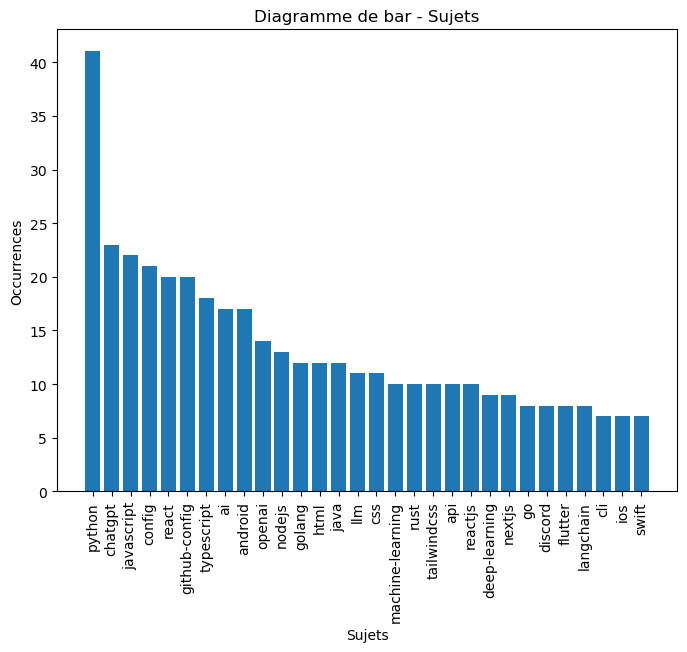

In [45]:
from collections import Counter
import matplotlib.pyplot as plt

# occurrences = Counter(langages)

# Extract the languages and their respective counts
topics = []
counts = []

for topic, count in top_topics:
    topics.append(topic)
    counts.append(count)

# Plot the occurrences as a bar plot
plt.figure(figsize=(8, 6))
plt.bar(topics, counts)
plt.title('Diagramme de bar - Sujets')
plt.xlabel('Sujets')
plt.ylabel('Occurrences')
plt.xticks(rotation='vertical')
plt.show()

On se rend compte que parmi les sujets dont on traite et parle le plus, il ya python, chatGPT, javascript, le machine learning, le deep learning. De façon générale, il s'agit de développement web et d'intelligence artificielle. Rien de surprenant vu l'émergence des GenAI comme ChatGPT créé par OpenAI. Python étant le langage le plus utilisé en IA, il fait partie des sujets. Bien que l'IA ait le vent en poupe, le monde du développement bouillonne en silence. D'où la présence de langages comme HTML, CSS (TailWindCSS) et Javascript avec son framework React. Le developpement mobile n'est pas en reste notamment avec Flutter basé sur Dart, Swift orienté iOS.